# Exploratory Data Analysis

# Dictionary:

age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if>50k else 0;* age;

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/renfelo/datascience/master/others/data_science/notebooks/city_census/data/census.csv')

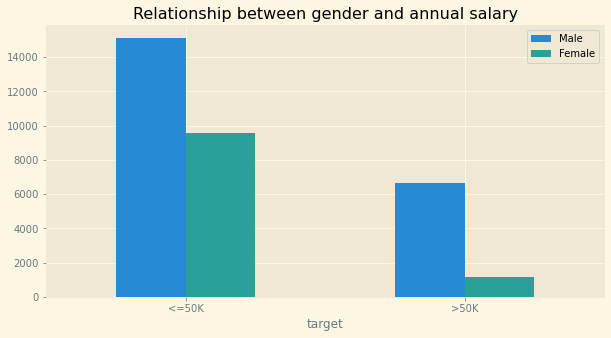

In [3]:
fig, ax = plt.subplots(figsize=(10,5))

pd.crosstab(df['target'], df['sex']).plot(kind='bar', title='Relationship between gender and annual salary', ax=ax)
ax.set_xticklabels(['<=50K', '>50K'], rotation=0)
ax.legend(['Male', 'Female'])

Text(0.5, 1.0, 'Relationship between education level and hours of work')

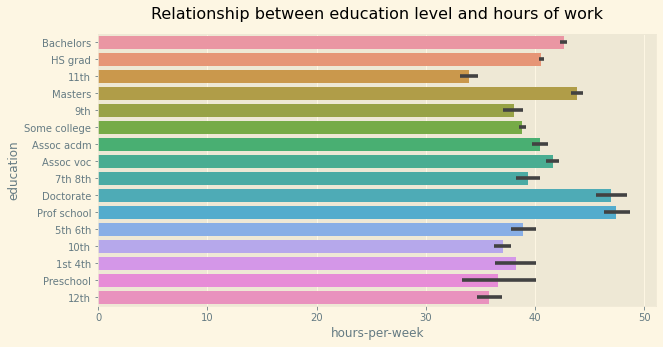

In [4]:
fig, ax = plt.subplots(figsize=(10,5))

barplot = sns.barplot(df['hours-per-week'], df['education'], ax=ax) 
barplot.set_title('Relationship between education level and hours of work', pad=15)

# Data Preprocessing

Features: age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if>50k else 0;  

In [5]:
import numpy as np
import re

In [6]:
raw_data = pd.read_table('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delim_whitespace=True, error_bad_lines=False)

In [7]:
df = raw_data.copy()

In [8]:
df = raw_data.T.reset_index().T.reset_index(drop=True)
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hour-per-week', 'native-country', 'target']
df.columns = column_names
df.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
0,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K


# Data Wrangling

Let's verify how consistent are the column data and modify if necessary

In [9]:
def verify_data_spread():
    for column in df.column:
        print(column, ':\n\n')
        print(df[column].value_counts())

In [10]:
def modify_symbol(symbol='?'):
    occurences = []
    for column in df.columns:
        df[column] = df[column].apply(lambda x: re.sub('[,.:]', '', x))
        df[column] = df[column].apply(lambda x: x.replace('-', ''))
        for index, value in df[column].items():
            if symbol in value and column not in occurences:
                occurences.append(column)
                
    for column in occurences:
        df[column] = df[column].apply(lambda x: x if '?' not in x else 'missing')
        

modify_symbol()                

In [11]:
for column in df.columns:
    numerical = ['age', 'fnlwgt', 'education-num', 'capital-loss', 'capital-gain', 'hour-per-week']
    
    if column in numerical:
        df[column] = df[column].apply(lambda x: x.split(',')[0] if ',' in x else x)
        df[column] = df[column].astype('int64')

# More Modifications

Some columns can be already modified to boolean ones, like sex and target; There are a bunch of zeroes inside some columns, but they are necessary;

In [12]:
df.tail(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
32560,52,Selfempinc,287927,HSgrad,9,Marriedcivspouse,Execmanagerial,Wife,White,Female,15024,0,40,UnitedStates,>50K


In [13]:
df['sex'].value_counts(), df['target'].value_counts()

(Male      21790
 Female    10771
 Name: sex, dtype: int64,
 <=50K    24720
 >50K      7841
 Name: target, dtype: int64)

In [14]:
df['sex'] = df.sex.apply(lambda x: 1 if 'Females' in x else 0)
df['target'] = df.target.apply(lambda x: 1 if '>50K' in x else 0)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,target
0,39,Stategov,77516,Bachelors,13,Nevermarried,Admclerical,Notinfamily,White,0,2174,0,40,UnitedStates,0
1,50,Selfempnotinc,83311,Bachelors,13,Marriedcivspouse,Execmanagerial,Husband,White,0,0,0,13,UnitedStates,0
2,38,Private,215646,HSgrad,9,Divorced,Handlerscleaners,Notinfamily,White,0,0,0,40,UnitedStates,0
3,53,Private,234721,11th,7,Marriedcivspouse,Handlerscleaners,Husband,Black,0,0,0,40,UnitedStates,0
4,28,Private,338409,Bachelors,13,Marriedcivspouse,Profspecialty,Wife,Black,0,0,0,40,Cuba,0


In [15]:
df['sex'].value_counts(), df['target'].value_counts()

(0    32561
 Name: sex, dtype: int64,
 0    24720
 1     7841
 Name: target, dtype: int64)

# Estimators

Features: age; workclass; fnlwgt; education; education-num; marital-status; occupation; relationship; race; sex: 1 if female else 0; capital-gain; capital-loss; hours-per-week; native-country; target: 1 if >50K else 0;

# Let's create our x and y variables

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
sample = df.iloc[:10000]

x = sample.drop('target', axis=1)
y = sample['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Data Imputation

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [20]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_features = ['age', 'fnlwgt', 'education-num', 'sex', 'capital-loss', 'capital-gain', 'hours-per-week']
numerical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1))])

preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_imputer, categorical_features),
    ('num', numerical_imputer, numerical_features)])

# Functions to get the base scores for each model

In [21]:
def get_base_prediction(model_dict):
    scores = {}
    for name, model in model_dict.items():
        model = Pipeline(steps=[
            ('preprocessor', preprocessor), 
            ('model', model)])
        
        model.fit(x_train, y_train)
        scores[name] = f'{model.score(x_test, y_test)* 100}%'
        
    return scores
    
get_base_prediction({'random_forest': RandomForestClassifier(), 
                     'k_neighbors': KNeighborsClassifier(), 
                     'linear_svc': LinearSVC()})

ValueError: A given column is not a column of the dataframe

# Hyperparameters tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# RandomizedSearch CV

In [ ]:
rf_grid = {
    'model__n_estimators': np.arange(250, 350, 5),
    'model__max_depth': np.arange(30, 60, 5),
    'model__min_samples_split': np.arange(5, 15, 5),
    'model__min_samples_leaf': np.arange(0, 10, 1)
}

model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', RandomForestClassifier(n_jobs=-1))])

rscv = RandomizedSearchCV(model, param_distributions=rf_grid, n_iter=30)

#rscv.fit(x_train, y_train)
#print(rscv.best_params_)
#print(f'{rscv.score(x_test, y_test)* 100}%')

#I am getting an error running this cell my reason for commenting the last three lines of codes

# GridSearch CV

In [ ]:
rf_grid = {
    'model__n_estimators': [250, 280, 300],
    'model__max_depth': [45, 50, 55],
    'model__min_samples_split': [10, 12],
    'model__min_samples_leaf': [1, 3, 5]
}

model = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', RandomForestClassifier(n_jobs=-1))])

gscv = GridSearchCV(model, param_grid=rf_grid, n_jobs=-1)

#gscv.fit(X_train, y_train)
#print(gscv.best_params_)
#print(f'{gscv.score(X_test, y_test) * 100}%')

# Model Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_preds = rsrf_model.predict(x_test)
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))